# CNN practice - CIFAR10 dataset

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

## The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

More details can be found in [cifar website](https://www.cs.toronto.edu/~kriz/cifar.html).

# Load libraries

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

## The dataset
Load the dataset and study it.

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
single_image = x_train[0]

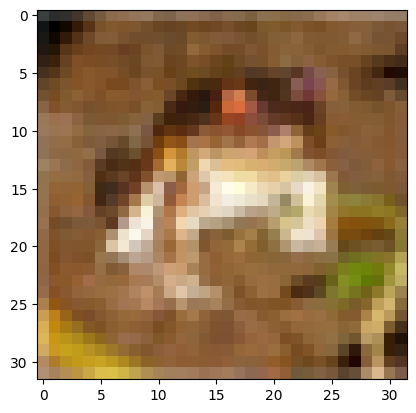

In [7]:
plt.imshow(single_image)

In [8]:
y_train[0]

array([6], dtype=uint8)

The classes each label points to can be found on the [CIFAR-10 webpage](https://www.cs.toronto.edu/~kriz/cifar.html).

## Data pre-processing

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# y_example = to_categorical(y_train,num_classes=10)
y_example = to_categorical(y_train)

In [11]:
y_example.shape

(50000, 10)

There are a total of 10 classes; however, we dont' need to set "num_classes=10" as it can be handled by the function *to_categorical*.

In [12]:
y_test_cat = to_categorical(y_test)

In [13]:
y_train_cat = to_categorical(y_train)

### Normalize

In [14]:
single_image.min(), single_image.max()

(0, 255)

Let's assume that all images vary in the same range.

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

In [17]:
scaled_image = x_train[0]

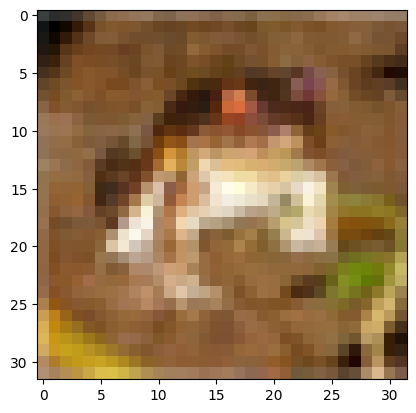

In [18]:
plt.imshow(scaled_image)

## Creating and training the model
### Creating

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
# DEFINE
model = Sequential()

# CONVOLUTIONAL LAYER(s)
# Layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same',
                input_shape=(32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Layer 2
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(2,2), padding='same',
                input_shape=(32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening out the images
model.add(Flatten())

# EXTRA DENSE LAYER(s)
model.add(Dense(256, activation='relu'))

# OUTPUT LAYER
# Choose "softmax" for the activation as it is a multi-classifier with 10 classes
model.add(Dense(10, activation='softmax'))

# COMPILE
# Choose "categorical_crossentropy" for the loss,
# again because the model is a multi-classifier
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 256)              

### Training

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience = 1)

In [41]:
model.fit(x_train, y_train_cat, epochs=15, batch_size = 32,
         validation_data = (x_test,y_test_cat),
         callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5500 - accuracy: 0.4321 - val_loss: 1.3570 - val_accuracy: 0.5021
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2638 - accuracy: 0.5417 - val_loss: 1.2721 - val_accuracy: 0.5469
Epoch 3/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1649 - accuracy: 0.5822 - val_loss: 1.1646 - val_accuracy: 0.5877
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0928 - accuracy: 0.6089 - val_loss: 1.1346 - val_accuracy: 0.5958
Epoch 5/15
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0381 - accuracy: 0.6307 - val_loss: 1.0845 - val_accuracy: 0.6115
Epoch 6/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9887 - accuracy: 0.6491 - val_loss: 1.0949 - val_accuracy: 0.6169


## Evaluating the model

In [42]:
metrics = pd.DataFrame(model.history.history)

In [43]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.550029,0.43208,1.356964,0.5021
1,1.263833,0.54166,1.272132,0.5469
2,1.164859,0.58216,1.164563,0.5877
3,1.092795,0.60892,1.134586,0.5958
4,1.038078,0.63072,1.084490,0.6115
5,0.988698,0.64912,1.094890,0.6169


<Axes: >

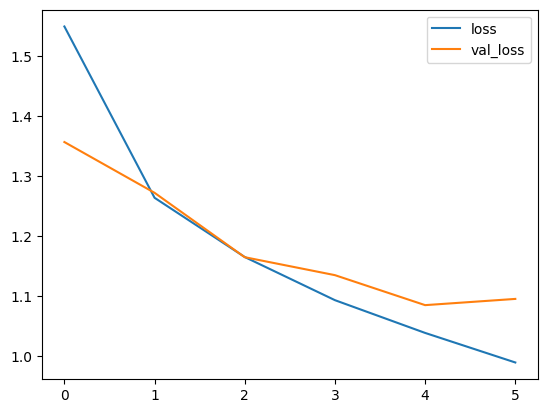

In [44]:
metrics[['loss','val_loss']].plot()

<Axes: >

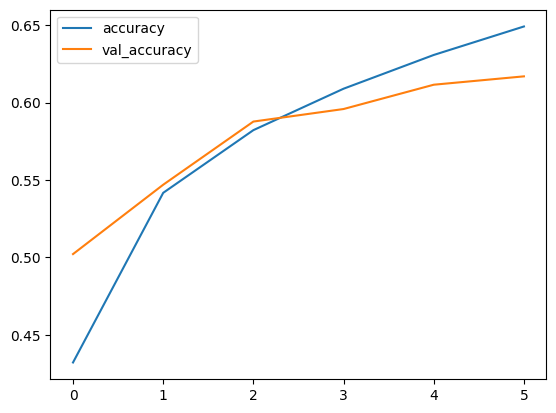

In [45]:
metrics[['accuracy','val_accuracy']].plot()

In [46]:
model.metrics_names

['loss', 'accuracy']

In [47]:
model.evaluate(x_test,y_test_cat,verbose=0)

[1.0948901176452637, 0.6169000267982483]

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [49]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1000
           1       0.71      0.77      0.74      1000
           2       0.50      0.55      0.53      1000
           3       0.39      0.59      0.47      1000
           4       0.57      0.52      0.54      1000
           5       0.64      0.35      0.46      1000
           6       0.72      0.70      0.71      1000
           7       0.82      0.52      0.64      1000
           8       0.70      0.80      0.74      1000
           9       0.74      0.63      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.62     10000
weighted avg       0.64      0.62      0.62     10000



In [51]:
# confusion_matrix(y_test,predictions)

In [52]:
import seaborn as sns

<Axes: >

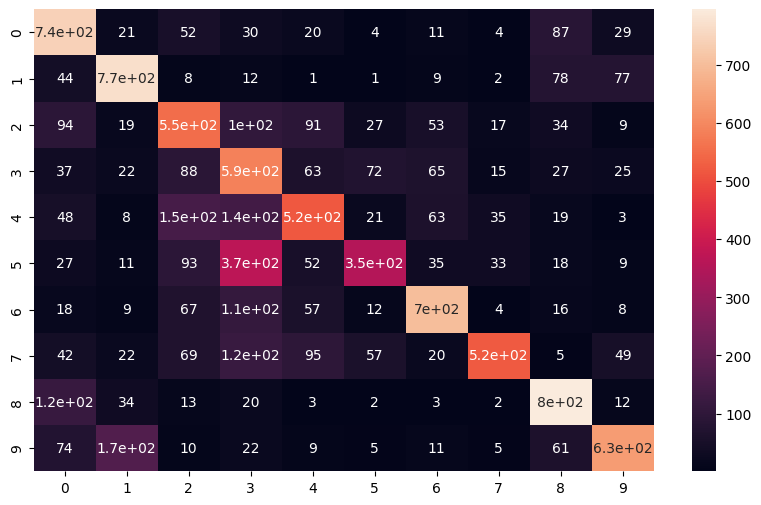

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

## Predict a single image

In [54]:
from random import randrange

1/1 [==============================] - 0s 15ms/step
Actual [3] vs Estimate [3]


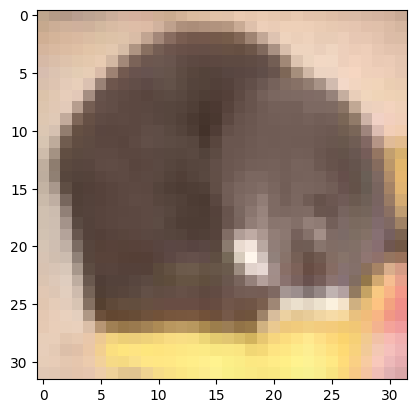

In [62]:
i = randrange(0,x_test.shape[0])
my_image = x_test[i].reshape(1,32,32,3)

my_image_pred = np.argmax(model.predict(my_image), axis=1)
my_image_real = y_test[i]

print("Actual {} vs Estimate {}".format(my_image_real,my_image_pred))

plt.imshow(my_image.reshape(32,32,3))